<a href="https://colab.research.google.com/github/jbirondo/Seaborn-Data-Visualization/blob/master/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 576x576 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 576x576 with 0 Axes>

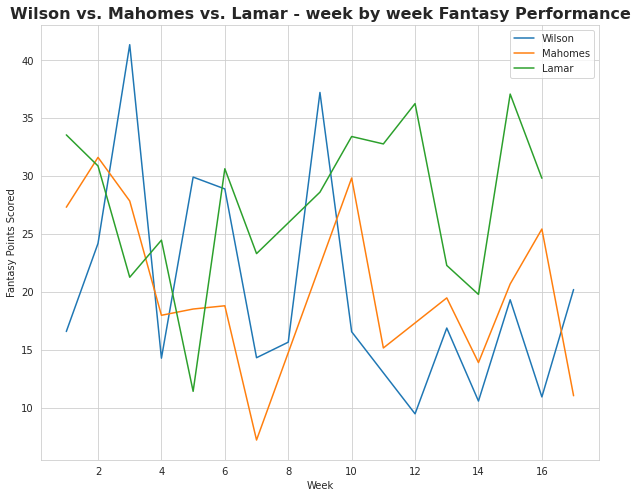

Player            object
Tm                object
Pos               object
Age              float64
G                float64
GS               float64
Tgt              float64
Rec              float64
PassingYds       float64
PassingTD        float64
PassingAtt       float64
RushingYds       float64
RushingTD        float64
RushingAtt       float64
ReceivingYds     float64
ReceivingTD      float64
FantasyPoints    float64
Int              float64
Fumbles          float64
FumblesLost      float64
dtype: object


<Figure size 1080x720 with 0 Axes>

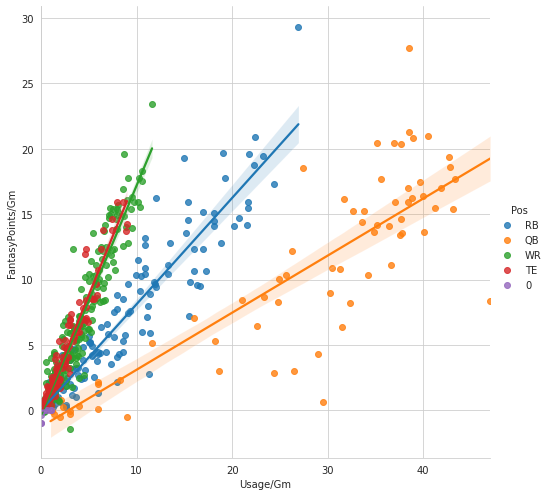

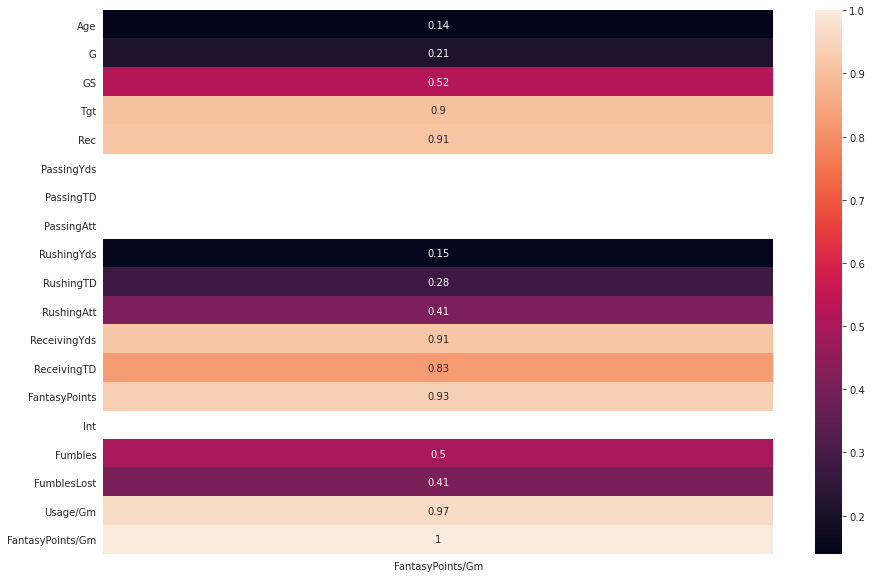

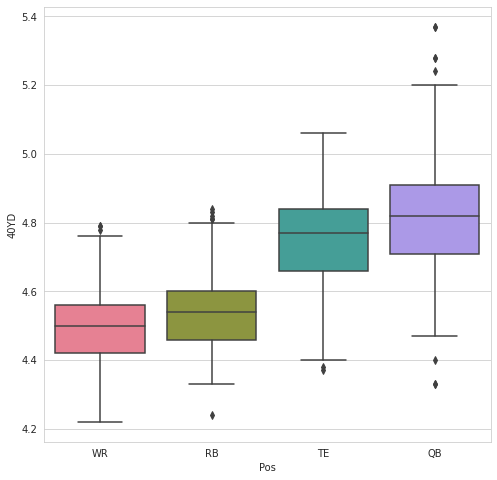

In [22]:

%matplotlib inline
"""
Read more about pd.set_option here:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
"""
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt


df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv').iloc[:, 1:]

# df.head()

"""
View the documentation for the info method here
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
"""

# df.info(verbose=True)
pd.set_option('chained_assignment', None) # we don't care about overriding the original df

# you could also do rb_df = df.loc[df['Pos'] == 'RB'].copy()
rb_df = df.loc[df['Pos'] == 'RB']

# Usage is defined as Tgt + RushingAtt
rb_df['Usage/G'] = (rb_df['Tgt'] + rb_df['RushingAtt']) / rb_df['G'] 

"""
Here, we're just looking at the last column of our DataFrame here.
"""

# rb_df.iloc[:, -1:].head()

"""
Don't type in this code if you're running these cells in order.
It will alter the rb_df and affect future code blocks.
"""

# rb_columns = ['Player', 'RushingAtt', 'Tgt']

# rb_df = df.loc[df['Pos'] == 'RB', rb_columns]

# rb_df[:1]

fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'Rec': 1 # adjust for PPR
}

"""
Here, we are using apply with axis=1
This allows to map a function across an entire row, instead of across a column.
To learn more information about apply and setting axis=1,
check out the pandas documentation.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
"""

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    
    return fantasy_points / g

# create a FantasyPoints/G column
rb_df['FantasyPoints/G'] = rb_df.apply(get_fantasy_points, axis=1)

"""
The columns we need here are our Player, Tm, G, all relevant RB columns, Usage/G and FantasyPoints/G (which were just assigned)
"""

rb_df = rb_df[['Player', 'Tm', 'G', 'RushingAtt', 'Tgt'] + list(fantasy_scoring_weights.keys()) + ['Usage/G', 'FantasyPoints/G']]

# rb_df.head()

sns.set_style('whitegrid') # setting style for visualizations

"""
seaborn documentation for scatter plots:
https://seaborn.pydata.org/generated/seaborn.scatterplot.html
"""

# set figure size in inches
# https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.figure.html
plt.figure(figsize=(8, 8))

# sns.scatterplot(rb_df['RushingAtt'], rb_df['Tgt'])

plt.figure(figsize=(12, 10))
# sns.regplot(rb_df['Usage/G'], rb_df['FantasyPoints/G'])


# kernel density restimation for RB rushing attempts
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
plt.figure(figsize=(8, 8))
# sns.kdeplot(rb_df['RushingAtt'])
# sns.kdeplot(rb_df['Tgt'])
# sns.distplot(rb_df['RushingAtt'])
# sns.distplot(rb_df['Tgt'], bins=30) # adjusting the bins column
# sns.distplot(rb_df['FantasyPoints/G'], bins=30) # adjusting the bins column
# plt.hist(rb_df['RushingAtt'])

"""
Here, we use the object-oriented API for matplotlib to be able to have greater
control over our plot.
We can use the fig and ax objects we get back from the plt.subplots function to annotate points
for example.
https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.subplots.html
matplotlib Axes object
https://matplotlib.org/3.3.0/api/axes_api.html
matplotlib Figure object
https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.figure.Figure.html
"""

# fig, ax = plt.subplots(figsize=(10, 8))

# notable_players = [
#     'Christian McCaffrey', 'Aaron Jones', 'Jamaal Williams', 'Mike Boone'
# ]

# for player_name in notable_players:
    
#     player = rb_df.loc[rb_df['Player'] == player_name]
    
#     # if our df we get back is not empty, run the code below
#     if not player.empty:
#         # grab targets and rushing attempts
#         targets = player['Tgt']
#         rushes = player['RushingAtt']
#         """
#         plt.annotate documentation is available here:
        
#         """
#         ax.annotate(player_name, xy=(rushes+2, targets+2), color='red', fontsize=12)
#         ax.scatter(rushes, targets, color='red')
    
# set ax parameter to the ax we created above with plt.subplots
# sns.kdeplot(rb_df['RushingAtt'], rb_df['Tgt'], ax=ax)
# sns.jointplot(rb_df['RushingAtt'], rb_df['Tgt'], kind='kde')

# sns.jointplot(rb_df['RushingAtt'], rb_df['Tgt'], kind='hex')


# sns.set_style('dark') # changing up the style

# sns.residplot(rb_df['Usage/G'], rb_df['FantasyPoints/G'])
# plt.title('Residual plot')
# plt.xlabel('Usage/GM') # this is how we set an x label in matplotlib
# plt.ylabel('Residual') # this is how we set a y label in matplotlib
# plt.show() # show our plot

# rb_df_copy = rb_df[[
#     'RushingAtt', 'RushingTD', 'FantasyPoints/G', 'Tgt'
# ]]

# sns.pairplot(rb_df_copy)

final_df = pd.DataFrame()

#note the curly braces in the string format. This allows the string to be updated with the format string method.
WEEKLY_BASE_URL = 'https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week{week_num}.csv'

for week in range(1, 18):
    df = pd.read_csv(WEEKLY_BASE_URL.format(week_num=week)) # index_col=0 not necessary here. Data is properly formatted with Unnamed: 0 column
    df['Week'] = week
    final_df = pd.concat([final_df, df])
    
# print(final_df.shape)
# final_df.head()

lamar = final_df.loc[final_df['Player'] == 'Lamar Jackson']
mahomes = final_df.loc[final_df['Player'] == 'Patrick Mahomes']
wilson = final_df.loc[final_df['Player'] == 'Russell Wilson']

# lamar
sns.set_style('whitegrid') # setting style
plt.subplots(figsize=(10, 8)) # setting figure size
plt.plot(wilson['Week'], wilson['StandardFantasyPoints']) # first argument is x, second is y
plt.plot(mahomes['Week'], mahomes['StandardFantasyPoints'])
plt.plot(lamar['Week'], lamar['StandardFantasyPoints'])
plt.legend(['Wilson', 'Mahomes', 'Lamar']) # setting legend in order of how we plotted things
plt.xlabel('Week')
plt.ylabel('Fantasy Points Scored')
plt.title('Wilson vs. Mahomes vs. Lamar - week by week Fantasy Performance', fontsize=16, fontweight='bold') # adjusting font size to 16px
plt.show() # show our visualization, not completely necessary, but surpresses unneccessary output from matplotlib

import numpy as np
plt.figure(figsize=(15, 10))
lamar = lamar.drop(['Rec', 'Tgt', 'ReceivingYds', 'ReceivingTD'], axis=1) # dropping non-relevant fantasy stats
# sns.heatmap(lamar.corr()[['StandardFantasyPoints']], annot=True)

df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv').iloc[:, 1:]
print(df.dtypes)
df_copy = df.copy(deep=True)

fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'PassingYds': 0.04,
    'PassingTD': 4,
    'Int': -2,
    'Rec': 1 # adjust for PPR
}

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    
    return fantasy_points / g

df_copy.loc[:, 'Usage/Gm'] = (df['PassingAtt'] + df['Tgt'] + df['RushingAtt'])/df['G']
df_copy.loc[:, 'FantasyPoints/Gm'] = df.apply(get_fantasy_points, axis=1)
sns.lmplot(data=df_copy, x='Usage/Gm', y='FantasyPoints/Gm', hue='Pos', height=7)

corr = df_copy.loc[df_copy['Pos'] == 'TE'].corr()[['FantasyPoints/Gm']]
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

COMBINE_URL = "https://raw.githubusercontent.com/fantasydatapros/data/master/combine/combine00to20.csv"

"""
The first two columns of this CSV file are messed up. Using iloc to grab all rows (:), and then grab the column indexed at 2 (so the third column), all the way to the last.
"""
combine_df = pd.read_csv(COMBINE_URL).iloc[:, 2:] # this is subject to change as I clean the data
combine_df.head()


"""
Here, we groupby the column Pos, and then print out descriptive statistics for the data using the describe method.
Try messing with this code and repeating this process for other columns as well.
Documentation for groupby
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
Documentation for describe
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
"""

combine_df.groupby('Pos')['40YD'].describe()


plt.figure(figsize=(8, 8))

"""
Information on how you can adjust the palette argument of this function
and all seaborn functions can be found here
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
Essentially, you need to create a palette object using the color_palette function
"""
sns.boxplot(x='Pos', y='40YD', data=combine_df, palette=sns.color_palette("husl", n_colors=4))